In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lightning_data_tmp = []
years = range(2016, 2021)
for y in years:
  lightning_data_y = pd.read_csv('/content/drive/My Drive/cmpe-255/lightning_ny_data/nooany_{}.csv'.format(y), index_col=0)
  lightning_data_tmp.append(lightning_data_y)

lightningdata = pd.concat(lightning_data_tmp)

Data Table and Feature Engineering


In [ ]:
from google.colab import data_table
data_table.DataTable(lightningdata)
# Convert New York to 1 for Plotting
print(lightningdata.head(5))
lightningdata['state']=lightningdata['state'].map({'New York' : 1})

                 state  zip_code  ... count_lightning  Center Point Geometry
date                              ...                                       
Jan 10, 2016  New York     12538  ...               2               0.000061
Jan 10, 2016  New York     11795  ...               1               0.000061
Jan 10, 2016  New York     11726  ...               2               0.000061
Jan 10, 2016  New York     12446  ...               1               0.000061
Jan 10, 2016  New York     12060  ...               2               0.000061

[5 rows x 5 columns]


In [ ]:
lightningdata.describe()

state      zip_code  count_lightning  Center Point Geometry
count  56772.0  56772.000000     56772.000000           56772.000000
mean       1.0  13404.233178        12.942049               0.000088
std        0.0    990.974892        50.017147               0.000611
min        1.0  10304.000000         1.000000               0.000049
25%        1.0  12828.000000         1.000000               0.000049
50%        1.0  13408.000000         3.000000               0.000055
75%        1.0  14131.000000         9.000000               0.000061
max        1.0  14903.000000      3116.000000               0.021277

In [ ]:
# Reset index date per year for Plotting
lightningdata.reset_index(level=0, inplace=True)
print(lightningdata.head(5))

           date  state  ...  count_lightning Center Point Geometry
0  Jan 10, 2016      1  ...                2              0.000061
1  Jan 10, 2016      1  ...                1              0.000061
2  Jan 10, 2016      1  ...                2              0.000061
3  Jan 10, 2016      1  ...                1              0.000061
4  Jan 10, 2016      1  ...                2              0.000061

[5 rows x 6 columns]


In [ ]:
# Convert date to year only for Plotting
lightningdata['year'] =  pd.DatetimeIndex(lightningdata['date']).year
print(lightningdata.head(5))

           date  state  zip_code  ... count_lightning  Center Point Geometry  year
0  Jan 10, 2016      1     12538  ...               2               0.000061  2016
1  Jan 10, 2016      1     11795  ...               1               0.000061  2016
2  Jan 10, 2016      1     11726  ...               2               0.000061  2016
3  Jan 10, 2016      1     12446  ...               1               0.000061  2016
4  Jan 10, 2016      1     12060  ...               2               0.000061  2016

[5 rows x 7 columns]


In [ ]:
# Year count for Ligthning Data
yearcount = lightningdata['count_lightning'].value_counts()
print(yearcount.head(5))
# detailed = lightningdata[['year', 'city', 'count_lightning', 'Center Point Geometry']].groupby(['year','city', 'count_lightning']).agg(['sum', 'count'])
detailed_yr = lightningdata[['year', 'city', 'count_lightning', 'Center Point Geometry']].groupby(['count_lightning']).agg(['count'])
# print(detailed.head(200))
sortyr = y=lightningdata.sort_values(by=['count_lightning'],ascending=False)
from google.colab import data_table
data_table.DataTable(detailed_yr)

1    15986
2     8356
3     5427
4     3739
5     2725
Name: count_lightning, dtype: int64


Visualization shows that Year 2018 has the highest count of lightning, and New York is the third city that has a highest count of lightning.


In [ ]:
import plotly.graph_objects as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = go.Figure( go.Histogram(x=lightningdata['city'], y=lightningdata['count_lightning']))
fig.update_layout(
    autosize=True,
    # width=1000,
    # height=1000,
    # margin=dict(
    #     l=10,
    #     r=10,
    #     b=100,
    #     t=100,
    #     pad=5
    # ),
    title="Lightning Data Per City",
    # xaxis_title="Ciy",
    yaxis_title="Lightning Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

In [ ]:
lightningdata[['year', 'city', 'zip_code', 'count_lightning', 'Center Point Geometry']].groupby(['year', 'city', 'count_lightning']).agg(['count'])

zip_code Center Point Geometry
                                                                           count                 count
year city                                               count_lightning                               
2016 Accord CDP                                         1                      5                     5
                                                        2                      3                     3
                                                        3                      1                     1
                                                        4                      1                     1
                                                        7                      1                     1
...                                                                          ...                   ...
2020 Zena CDP, West Hurley CDP, Port Ewen CDP, Kings... 2                      1                     1
                                                        4                      1                     1
                                                        6                      1                     1
                                                        7                      1                     1
                                                        37                     1                     1

[28567 rows x 2 columns]

In [ ]:
import plotly.graph_objects as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = go.Figure( go.Box(x=lightningdata['year'], y=lightningdata['count_lightning'], boxmean=True, boxpoints = False))
fig.update_layout(
    autosize=True,
    # width=1000,
    # height=1000,
    # margin=dict(
    #     l=10,
    #     r=10,
    #     b=0,
    #     t=0,
    #     pad=10
    # ),
    title="Lightning Data Quantile Plot Per Year",
    # xaxis_title="Ciy",
    xaxis=dict(tickformat="1."),
    yaxis_title="Lightning Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
# layout = go.Layout(xaxis=dict(tickformat=".2%"))

fig.show()

In [ ]:
import plotly.graph_objects as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = go.Figure( go.Histogram(x=lightningdata['year'], y=lightningdata['count_lightning'], histnorm='probability density'))
fig.update_layout(
    autosize=True,
    # width=1000,
    # height=1000,
    # margin=dict(
    #     l=10,
    #     r=10,
    #     b=0,
    #     t=0,
    #     pad=10
    # ),
    title="Lightning Data Distribution Using Probability Density",
    # xaxis_title="Ciy",
    xaxis=dict(tickformat="1."),
    yaxis_title="Lightning Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
# layout = go.Layout(xaxis=dict(tickformat=".2%"))

fig.show()

In [ ]:
import plotly.graph_objects as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = go.Figure( go.Histogram(x=lightningdata['zip_code'], y=lightningdata['city'], autobinx=True))
fig.show()

Cities that has biggest Geometrical coverage of lightning


In [ ]:
import plotly.graph_objects as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = go.Figure(go.Histogram2dcontour(x=lightningdata['city'], y=lightningdata['Center Point Geometry'].value_counts()))
fig.update_layout(
    autosize=True,
    # width=1000,
    # height=1000,
    # margin=dict(
    #     l=10,
    #     r=10,
    #     b=0,
    #     t=0,
    #     pad=10
    # ),
    title="Lightning Data Distribution 2D Contour",
    # xaxis_title="Ciy",
    xaxis=dict(tickformat="1."),
    yaxis_title="Lightning Count Per City",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
# layout = go.Layout(xaxis=dict(tickformat=".2%"))

fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:721: DeprecationWarning:

plotly.graph_objs.Histogram2dcontour is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.Histogram2dContour




Visualization shows that New York City Count of Lightning vs Center Point of Geometry Comparison has no difference

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



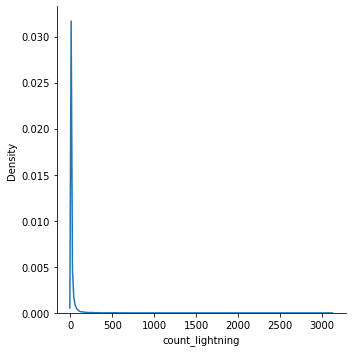

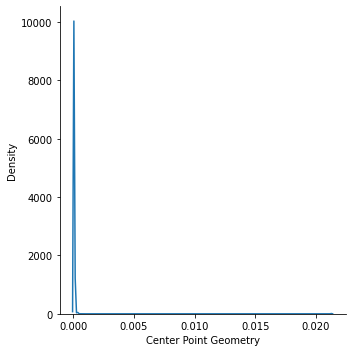

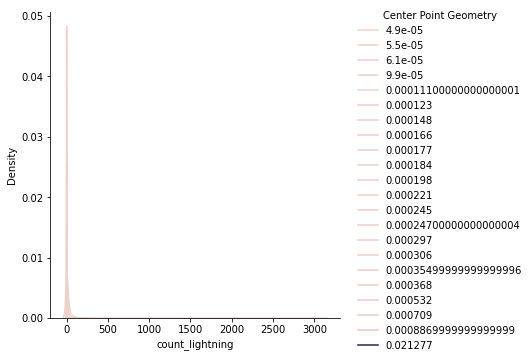

In [ ]:
# Plotting the KDE Plot 
sns.displot(lightningdata, x="count_lightning", kind="kde", bw_adjust=.50)
sns.displot(lightningdata, x="Center Point Geometry", kind="kde", bw_adjust=.50)
sns.displot(lightningdata, x="count_lightning", hue="Center Point Geometry", kind="kde")